In [1]:
import pandas as pd 

amzn = pd.read_csv(r'C:\AIEBA Datasets\Proj1 Datasets\AmazonReviews.csv',encoding='utf-8',engine='python')

# Drop columns that are not needed and standardize column names
amzn = amzn.filter(items=['reviews.rating', 'reviews.text'])
amzn = amzn.rename(columns={"reviews.rating":"reviews_rating", "reviews.text":"reviews_text"})

amzn = amzn.dropna()
amzn.head()

,reviews_rating,reviews_text
0,5.0,This $product so far has not%&^# disappointed....
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


2.0      402
1.0      410
3.0     1499
4.0     8541
5.0    23774
Name: reviews_rating, dtype: int64

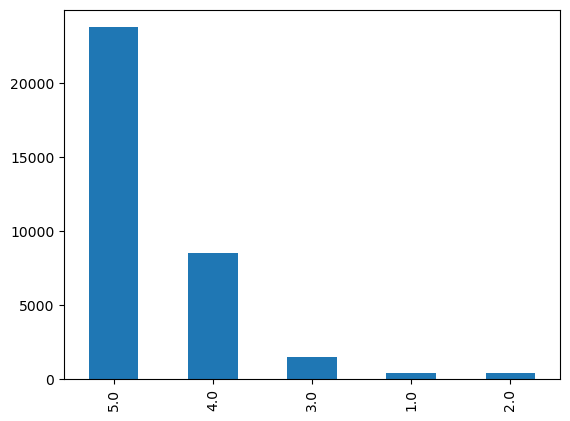

In [2]:
amzn["reviews_rating"].value_counts().plot.bar()
amzn["reviews_rating"].value_counts(ascending=True)

,reviews_rating,reviews_text
11292,5.0,Very good item for a very reasonable price. Ea...
2332,5.0,My kids got this to replace their Ipads and ha...
28255,5.0,Whole family is enjoying it! Kids and we are b...
22030,5.0,If you are looking to explore what AI can offe...
15273,5.0,My daughter loves her tablet because she can c...
...,...,...
1368,1.0,I am bring it back for an exchange. (a differe...
14902,1.0,I bought a Kindle Fire 16GB for my 6 year old ...
4185,1.0,It wouldn't connect to internet. Tried at home...
3356,1.0,A waste of money. You don't need this. Just pl...


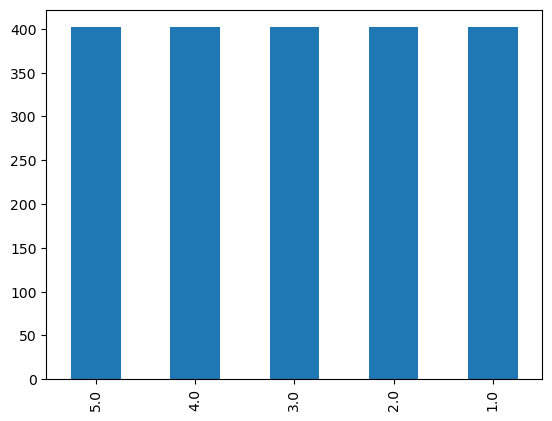

In [3]:
# perform undersampling to get balanced dataset

least_class_amount, class_1, class_3, class_4, class_5 = amzn.reviews_rating.value_counts(ascending=True)

# create separate dataframes for each rating
c5 = amzn[amzn["reviews_rating"] == 5.0]
c4 = amzn[amzn["reviews_rating"] == 4.0]
c3 = amzn[amzn["reviews_rating"] == 3.0]
c2 = amzn[amzn["reviews_rating"] == 2.0]
c1 = amzn[amzn["reviews_rating"] == 1.0]

# randomly remove data to in each dataframe to match the number of rows in c2 which has the least amount of data
df_5 = c5.sample(least_class_amount, random_state=100)
df_4 = c4.sample(least_class_amount, random_state=100)
df_3 = c3.sample(least_class_amount, random_state=100)
df_1 = c1.sample(least_class_amount, random_state=100)

# concatenate all 5 dataframes into 1
undersampled = pd.concat([df_5, df_4, df_3, c2, df_1], axis=0)
amzn = undersampled
amzn.reviews_rating.value_counts().plot.bar()
amzn.reviews_rating.value_counts()
amzn

In [4]:
# remove non-ascii characters
amzn["reviews_text"] = amzn["reviews_text"].str.encode('ascii', 'ignore').str.decode('ascii')

In [5]:
# using regular expressions to remove unwanted characters and punctuations
import re

def cleanup(sentence):
  sentence = str(sentence).lower()
  sentence = cleanup_re.sub('',sentence).strip() 
  sentence = re.sub('[\d]','',sentence) # remove all digits and numbers
  return sentence
  
cleanup_re = re.compile('[^\w\s]') # match whitespaces words only
amzn["reviews_text"] = amzn["reviews_text"].apply(cleanup)
amzn

,reviews_rating,reviews_text
11292,5.0,very good item for a very reasonable price eas...
2332,5.0,my kids got this to replace their ipads and ha...
28255,5.0,whole family is enjoying it kids and we are bo...
22030,5.0,if you are looking to explore what ai can offe...
15273,5.0,my daughter loves her tablet because she can c...
...,...,...
1368,1.0,i am bring it back for an exchange a different...
14902,1.0,i bought a kindle fire gb for my year old son...
4185,1.0,it wouldnt connect to internet tried at home a...
3356,1.0,a waste of money you dont need this just plug ...


In [6]:
# remove stopwords 
import nltk
from nltk.corpus import stopwords

def remove_stopwords(sentence):
  sentence = sentence.split()
  sentence = [word for word in sentence if word not in stoplist]
  sentence = ' '.join(sentence)
  return sentence
    

def custom_stoplist():
  stop_words = set(stopwords.words('english'))
  wanted_stopwords = {'not', 'nor', 'no', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'very'} # stopwords that can change a sentence's meaning
  stoplist = stop_words - wanted_stopwords
  return stoplist

stoplist = custom_stoplist()
amzn["reviews_text"] = amzn["reviews_text"].apply(remove_stopwords)
amzn

,reviews_rating,reviews_text
11292,5.0,very good item very reasonable price easy work...
2332,5.0,kids got replace ipads havent missed beat
28255,5.0,whole family enjoying kids able use user friendly
22030,5.0,looking explore ai offer daily life amazon ale...
15273,5.0,daughter loves tablet carry places
...,...,...
1368,1.0,bring back exchange different make
14902,1.0,bought kindle fire gb year old son june months...
4185,1.0,wouldnt connect internet tried home couple wif...
3356,1.0,waste money dont need plug tablet computer cha...


In [7]:
# perform 80-20 split on data
from sklearn.model_selection import train_test_split
train, test = train_test_split(amzn, test_size=0.2, train_size=0.8, random_state=100) 
# random_state controls how data is being shuffled
# ensures that data is being shuffled the same way every time the cell is being ran
train

,reviews_rating,reviews_text
4151,4.0,got father law loves play games read books news
34566,3.0,loyal roku since got k tv wanted something str...
23128,3.0,like doesnt always get commands correct doesnt...
2928,1.0,had return product not compatible things faceb...
14558,3.0,first tablet would recommend youve ever had ip...
...,...,...
3100,1.0,actually paid adapter youre mind
14413,1.0,purchased amazon fire reviews good realized le...
4683,1.0,got tablet christmas used one day next day cou...
10580,4.0,youre getting value tablet great choiceprofile...


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


def remove_stopwords():
  import nltk
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  print(stop_words)


training_sentences = train["reviews_text"].tolist()
training_labels = train["reviews_rating"].tolist()
test_sentences = test["reviews_text"].tolist()
test_labels = test["reviews_rating"].tolist()
vocab_size = 20000 # number of words that will be fed into model 
max_length = 40 #
trunc_type='post' # 
padding_type='post' #
oov_tok = "<OOV>" # placeholder if model encounters words it has never seen before in the test set

# Tokenization - breaking down sentences into its individual words and assigning a number to it
tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index # Model's 'vocabulary' learnt from training data

# Sequencing - converting each sentence into its numerical equivalent
# Padding and truncating used to make all sentences same length 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type,
                               truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type,
                               truncating=trunc_type)

In [9]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = tf.keras.utils.to_categorical(training_labels)
test_padded = np.array(test_padded)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [14]:
test_labels

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
import keras
import keras_tuner as kt
num_of_ratings = 6 # number of possible ratings given by users: 1 to 5

def model_builder(hp): 

    # Tuning params 
    embedding_dim = hp.Int('output_dim', min_value=8, max_value=128, step=8)
    dropout = hp.Boolean('dropout')
    dropout_rate = hp.Choice('rate', values=[0.2,0.3,0.4,0.5])
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Creating model 
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(keras.layers.GlobalAveragePooling1D())
    if dropout:
        model.add(keras.layers.Dropout(rate = dropout_rate))
    for i in range(hp.Int('layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int('units_'+ str(i), 20, 100, step=10), activation='relu')) 

    model.add(keras.layers.Dense(num_of_ratings, activation='softmax'))                                                                        

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [11]:
#USE RANDOM SEARCH INSTAD OF HYPERBAND 

#using hyperband to search for the best parameters 
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


In [17]:
#early stopping  
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [18]:
tuner.search(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels), callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
hypermodel_hb= tuner.hypermodel.build(best_hps)
hypermodel_hb.summary()

In [ ]:
sentence = ["product took super long to come, not worth it"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
output= hypermodel_hb.predict(padded)

print(output)
print("Review:", sentence)
print("Rating:", np.argmax(output, axis=None, out=None))